In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === STEP 1: Load parameters from problem.ini ===
def read_flat_problem_ini(path):
    with open(path, 'r') as f:
        values = f.read().strip().split()
        if len(values) != 4:
            raise ValueError("Expected 4 space-separated values in problem.ini")
        x_min, x_max, delta_t, alpha = map(float, values)
    return x_min, x_max, delta_t, alpha

x_min, x_max, delta_t, alpha = read_flat_problem_ini("Setup/problem.ini")

# === STEP 2: Load initial condition to get grid size ===
T0 = np.fromfile("Setup/init.dat", dtype=np.float64)
N = T0.size
x = np.linspace(x_min, x_max, N)

# === STEP 3: Load Output/output_100.dat ===
output_path = "Output/output_100.dat"
T = np.fromfile(output_path, dtype=np.float64)

# === STEP 4: Plot temperature profile at time step 100 ===
plt.figure(figsize=(8, 4))
plt.plot(x, T, label="T(x) at step 100")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.title("Heat Equation: Temperature at time step 100")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


ValueError: Expected 4 space-separated values in problem.ini

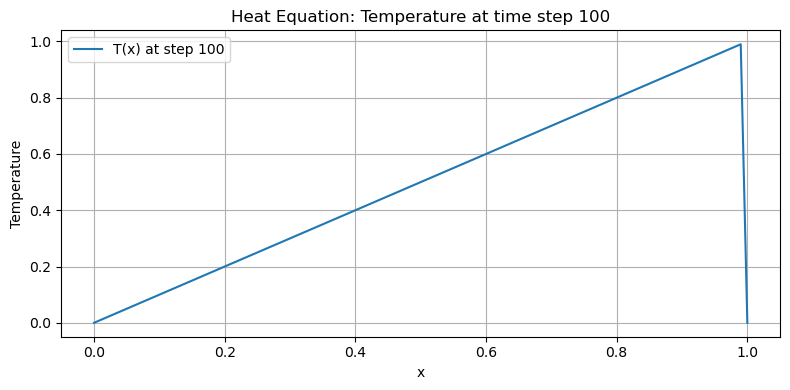

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === STEP 1: Load parameters from problem.ini ===
def read_flat_problem_ini(path):
    with open(path, 'r') as f:
        values = {}
        for line in f:
            key, value = line.split('=')
            values[key.strip()] = float(value.strip())
    return values['x_min'], values['x_max'], values['delta_t'], values['diffusion_coefficient']

x_min, x_max, delta_t, alpha = read_flat_problem_ini("Setup/problem.ini")

# === STEP 2: Load initial condition to get grid size ===
T0 = np.fromfile("Setup/init.dat", dtype=np.float64)
N = T0.size
x = np.linspace(x_min, x_max, N)

# === STEP 3: Load Output/output_100.dat ===
output_path = "Output/output_100.dat"
T = np.fromfile(output_path, dtype=np.float64)

# === STEP 4: Plot temperature profile at time step 100 ===
plt.figure(figsize=(8, 4))
plt.plot(x, T, label="T(x) at step 100")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.title("Heat Equation: Temperature at time step 100")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

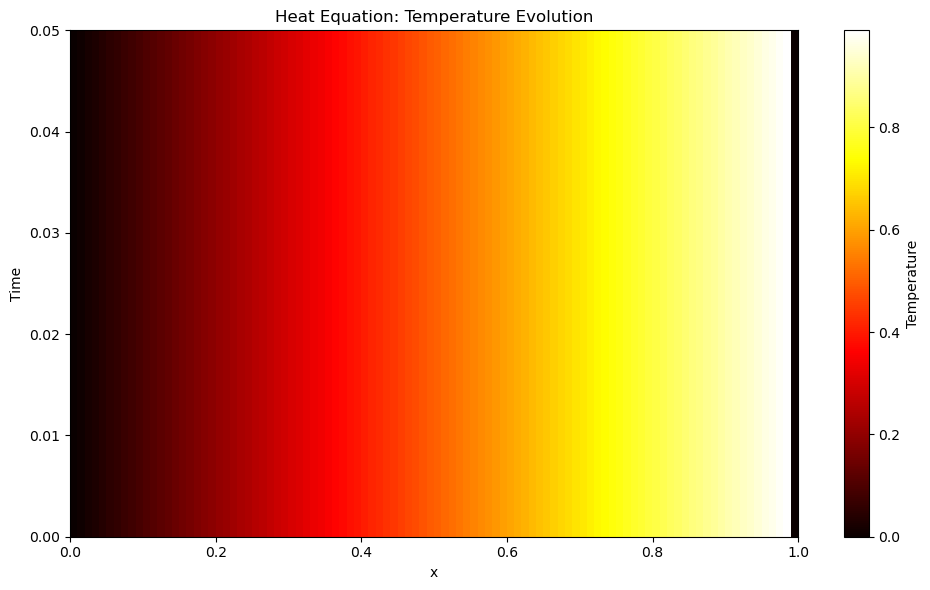

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import subprocess

# === STEP 1: Load parameters from Setup/problem.ini ===
def read_flat_problem_ini(path):
    with open(path, 'r') as f:
        values = {}
        for line in f:
            if '=' in line:
                key, value = line.split('=')
                values[key.strip()] = float(value.strip())
    return values['x_min'], values['x_max'], values['delta_t'], values['diffusion_coefficient']

x_min, x_max, delta_t, alpha = read_flat_problem_ini("Setup/problem.ini")

# === STEP 2: Load Setup/init.dat to determine grid size ===
T0 = np.fromfile("Setup/init.dat", dtype=np.float64)
N = T0.size
x = np.linspace(x_min, x_max, N)

# === STEP 3: Load all Output/output_*.dat files ===
output_folder = "Output"
output_files = sorted([
    f for f in os.listdir(output_folder)
    if f.startswith("output_") and f.endswith(".dat")
], key=lambda name: int(name.split("_")[1].split(".")[0]))

if not output_files:
    print("No output files found in Output/.")
    exit(1)

temperature_data = []
for filename in output_files:
    path = os.path.join(output_folder, filename)
    T = np.fromfile(path, dtype=np.float64)
    temperature_data.append(T)

temperature_data = np.array(temperature_data)  # shape: (timesteps, N)

# === STEP 4: Time axis ===
timesteps = temperature_data.shape[0]
time = np.linspace(0, delta_t * timesteps, timesteps)

# === STEP 5: Plot heatmap ===
plt.figure(figsize=(10, 6))
extent = [x_min, x_max, 0, time[-1]]

plt.imshow(temperature_data, aspect='auto', origin='lower', extent=extent, cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel("x")
plt.ylabel("Time")
plt.title("Heat Equation: Temperature Evolution")
plt.tight_layout()
plt.show()


In [8]:
print(temperature_data.shape)  # Debugging line to check the shape of the data

(11, 100)


Running main.exe...


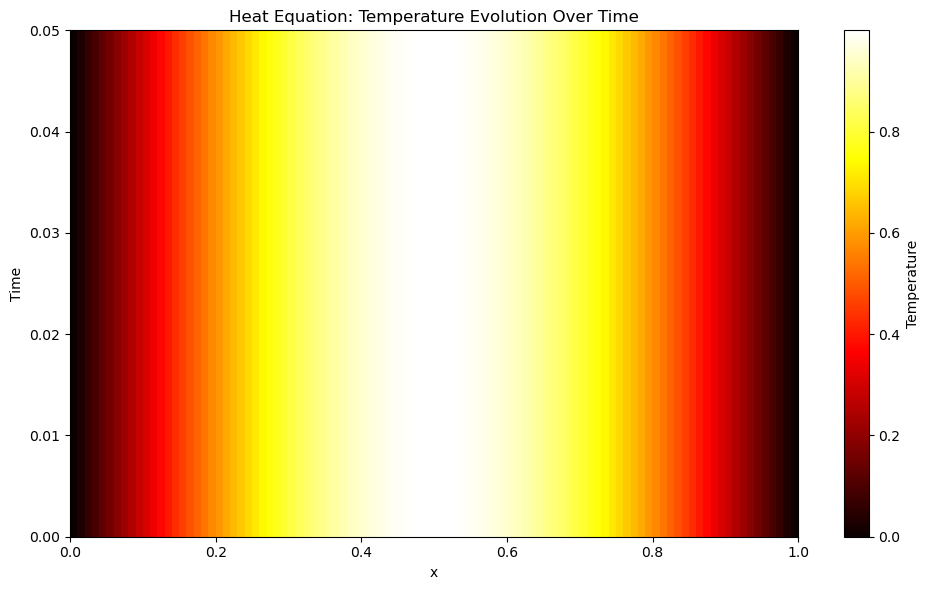

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
import subprocess

# === PARAMETERS ===
N = 100                   # Number of spatial points (excluding boundaries)
tf = 0.5                  # Final time
alpha = 1.0               # Diffusion coefficient
x_min, x_max = 0.0, 1.0   # Spatial domain
dt = 0.5 / 110            # Time step (example)

# === STEP 1: Generate initial condition ===
os.makedirs("Setup", exist_ok=True)
os.makedirs("Output", exist_ok=True)

x = np.linspace(x_min, x_max, N)
T0 = np.sin(np.pi * x)   # Example: sine wave initial condition
T0.astype(np.float64).tofile("Setup/init.dat")

# === STEP 2: Write problem.ini ===
with open("Setup/problem.ini", "w") as f:
    f.write(f"x_min = {x_min}\n")
    f.write(f"x_max = {x_max}\n")
    f.write(f"delta_t = {dt:.16f}\n")
    f.write(f"diffusion_coefficient = {alpha}\n")

# === STEP 3: Run the compiled C++ program ===
print("Running main.exe...")
result = subprocess.run(["main.exe"])  # If using Linux/Mac, change to ./main
if result.returncode != 0:
    print("C++ program failed.")
    exit(1)

# === STEP 4: Read output files ===
output_files = sorted([
    f for f in os.listdir("Output")
    if f.startswith("output_") and f.endswith(".dat")
], key=lambda name: int(name.split("_")[1].split(".")[0]))

if not output_files:
    print("No output files found in Output/.")
    exit(1)

temperature_data = []
for filename in output_files:
    path = os.path.join("Output", filename)
    T = np.fromfile(path, dtype=np.float64)
    temperature_data.append(T)

temperature_data = np.array(temperature_data)  # shape: (timesteps, N)

# === STEP 5: Time and space axes ===
timesteps = temperature_data.shape[0]
time = np.linspace(0, dt * timesteps, timesteps)
x = np.linspace(x_min, x_max, N)

# === STEP 6: Plot heatmap ===
plt.figure(figsize=(10, 6))
extent = [x_min, x_max, 0, time[-1]]
plt.imshow(temperature_data, aspect='auto', origin='lower', extent=extent, cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel("x")
plt.ylabel("Time")
plt.title("Heat Equation: Temperature Evolution Over Time")
plt.tight_layout()
plt.show()
